In [1]:
import cv2 as cv
import os
from matplotlib import pyplot as plt
import numpy as np

dataDir = '../dataset/images' # Change this, according to your images' directory path

In [2]:
img = cv.imread(os.path.join(dataDir, 'road57.png')) # Change this, according to your image's path

In [3]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#set the bounds for the red hue
lower_red = np.array([0,100,100])
upper_red = np.array([20,255,255])

#create a mask using the bounds set
mask = cv.inRange(hsv, lower_red, upper_red)
#create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv.bitwise_and(img, img, mask=mask)
#Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)

#create resizable windows for the images
cv.namedWindow("res", cv.WINDOW_NORMAL)
cv.namedWindow("hsv", cv.WINDOW_NORMAL)
cv.namedWindow("mask", cv.WINDOW_NORMAL)
cv.namedWindow("added", cv.WINDOW_NORMAL)
cv.namedWindow("back", cv.WINDOW_NORMAL)
cv.namedWindow("mask_inv", cv.WINDOW_NORMAL)
cv.namedWindow("gray", cv.WINDOW_NORMAL)



while(1):
    cv.imshow("mask_inv", mask_inv)
    k = cv.waitKey(10) & 0XFF
    if k == 27:
        break
cv.destroyAllWindows()

NameError: name 'OXFF' is not defined

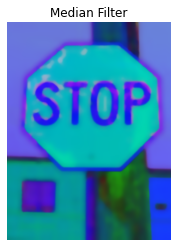

In [51]:
imgWithMedianFilter = cv.medianBlur(img, 5)

plt.imshow(img)
plt.title('Median Filter')
plt.axis('off')
plt.show()

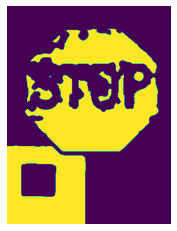

In [53]:
#set the lower and upper bounds for the green hue
lower_red = np.array([0,100,100])
upper_red = np.array([20,255,255])

#create a mask for green colour using inRange function
mask = cv.inRange(img, lower_red, upper_red)

#perform bitwise and on the original image arrays using the mask
res = cv.bitwise_and(img, img, mask=mask)

#display the images
plt.imshow(mask)
plt.axis('off')
plt.show()